In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import dataframe_image as dfi
import time
warnings.filterwarnings("ignore")
%matplotlib inline

In [60]:
df = pd.read_csv('data/admission.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [66]:
# Observing first five records of the training dataset
df.head()
dfi.export(df.head(), 'df_head.png')

In [63]:
# Remove the serial number column as it has no impact in the dataset
df = df.drop('Serial No.', axis=1)

In [64]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [68]:
# Lets see the statistical summary of the training dataset
df.describe()
dfi.export(df.describe(), 'df_describe.png')

Observations: <br>
Average chance of admission score of the applicants is 72%. <br>
Applicants chances of admit ranges from 34% to 97%. <br>
There is no null/missing values in the dataset as each of the features have 500 records.

#### Data Visualization

<AxesSubplot:>

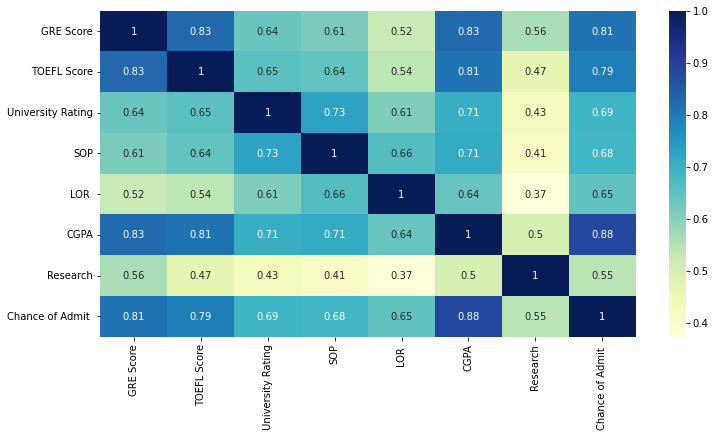

In [50]:
# Checking the correlations between the features using seaborn heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Observations: <br>
CGPA and GRE Score has the highest positive correlation with the chance of admit which means the applicants with higher CGPA and GRE score
were most likely to be accepted to the universities. <br>
Those who have higher CGPA has the high GRE Score. <br>


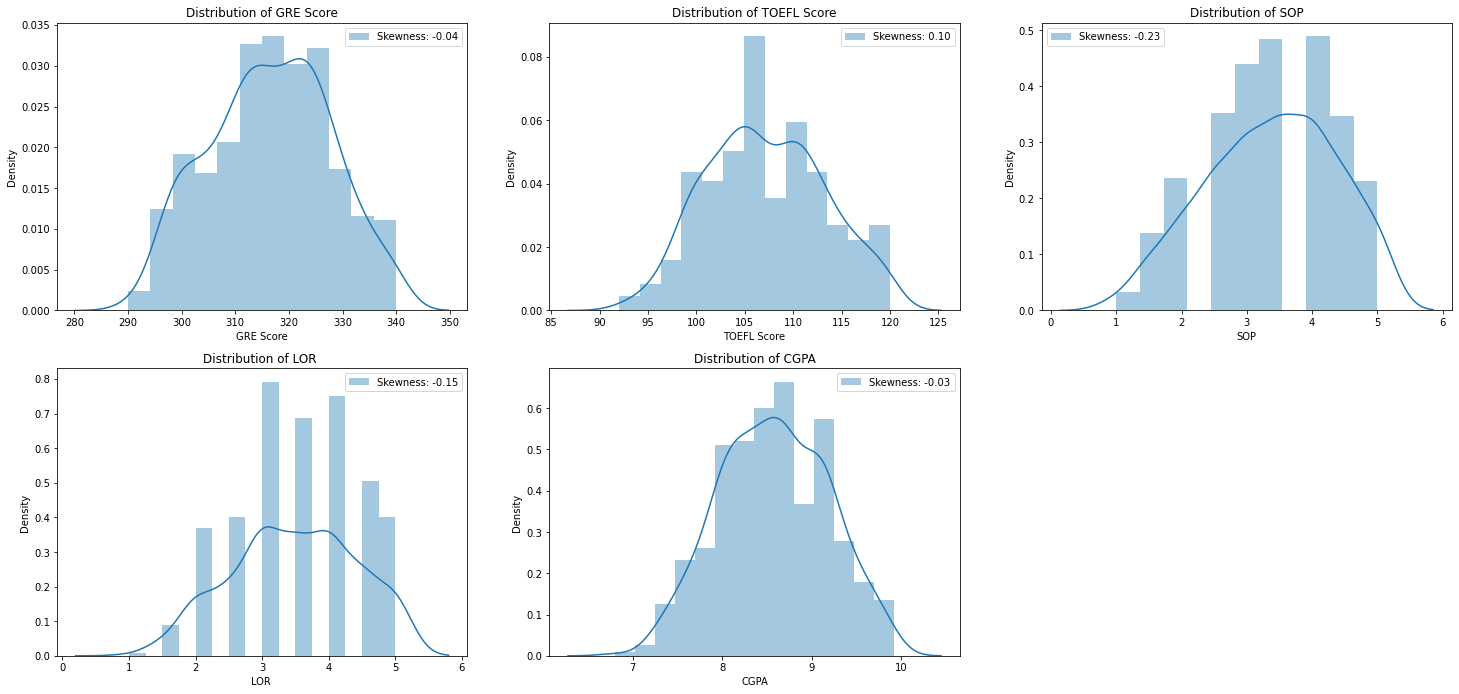

In [58]:
# Grouping features
cat_features = ['Research', 'University Rating']
num_features = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']

plt.figure(figsize=(25,18))
for i, j in enumerate(num_features):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[j], label= 'Skewness: %.2f'%(df[j].skew()))
    plt.legend()
    plt.title(f"Distribution of {j}")

Observations: <br>
From the distribution plots we can see that, GRE Score, SOP, CGPA, LOR are negatively skewed which means the distribution is slightly shifted to the left and there are slightly more values on the right side of the distribution. It is also worth noting that the degree of skewness is relatively small so it is not that significantly skewed.

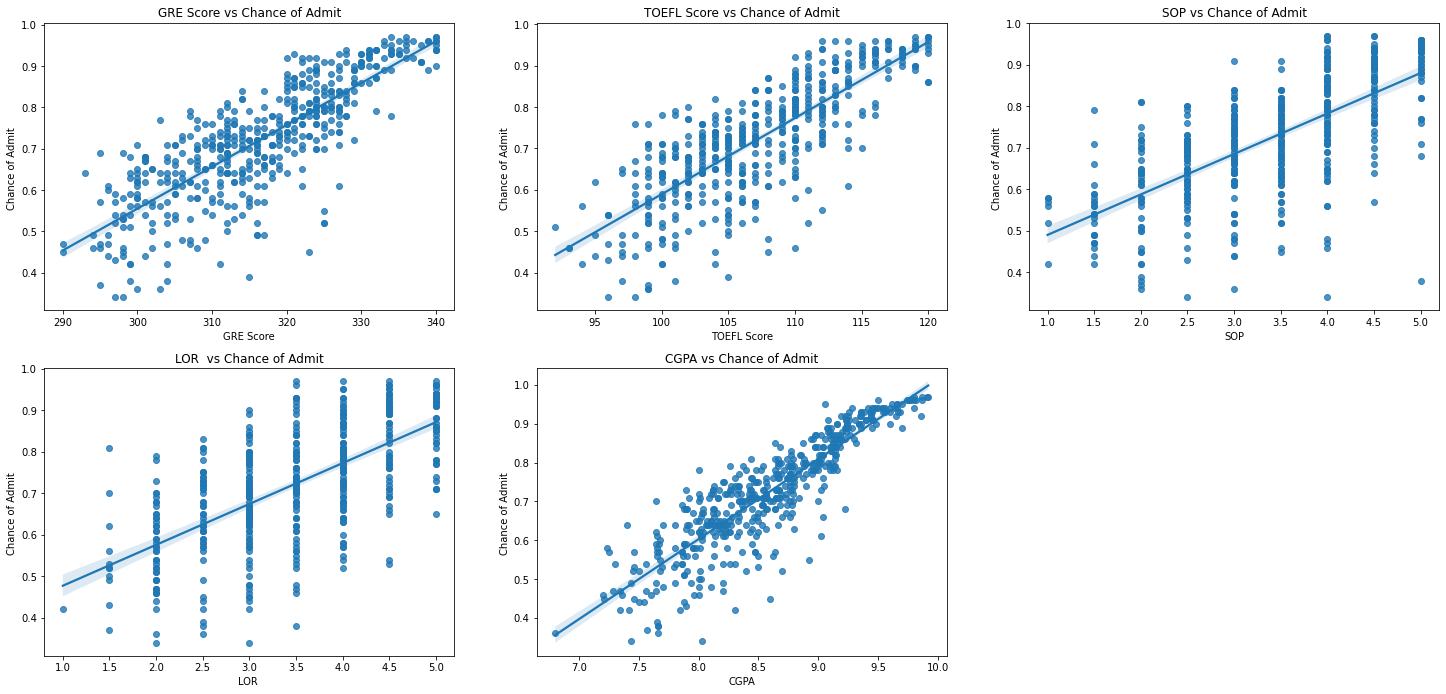

In [53]:
# Lets see the relation of the features with chance of being admitted (Numerical Variables)
plt.figure(figsize=(25,18))
for i, j in enumerate(num_features):
    plt.subplot(3, 3, i+1)
    sns.regplot(x=j, y='Chance of Admit ', data=df)
    plt.title(f"{j} vs Chance of Admit")

Observations: <br>
Applicants having higher CGPA, GRE Score and TOEFL Score were most likely to be accepted. <br>
LOR and SOP has some impact on the admission chances but there were applicants having low LOR and SOP ratings but still got admitted. <br>

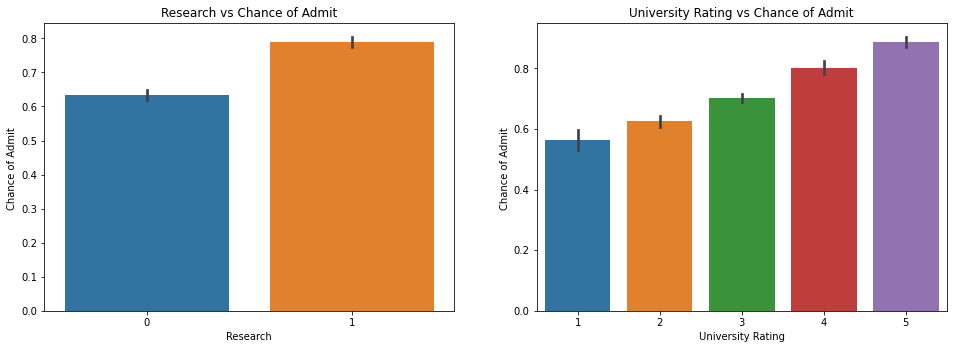

In [70]:
# Lets see the relation of the features with chance of being admitted (Cat Variables)
plt.figure(figsize=(25,18))
for i, j in enumerate(cat_features):
    plt.subplot(3, 3, i+1)
    sns.barplot(x=j, y='Chance of Admit ', data=df)
    plt.title(f"{j} vs Chance of Admit")

Observations: <br>
The applicants who has published research papers before has the higher chance of being accepted. However, the applicants without research 
were also accepted with the acceptance rate of approx 62%. <br>
Applicants who were from top rated universities had the higher chance of acceptance.

#### Model Building

In [152]:
# Split dependent and independent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [154]:
# Model Initilization
regression_models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor()
}

In [155]:
results = []

for name, model in regression_models.items():
    start_time = time.time()
    cv_score = cross_val_score(model, X_train,y_train, scoring="neg_root_mean_squared_error", cv=6)
    total_time = time.time() - start_time

    results.append({
        'ModelName': name,
        'MSE': -1 * cv_score.mean(),
        'Time': total_time
    })

results = pd.DataFrame(results)

    

<AxesSubplot:xlabel='ModelName', ylabel='MSE'>

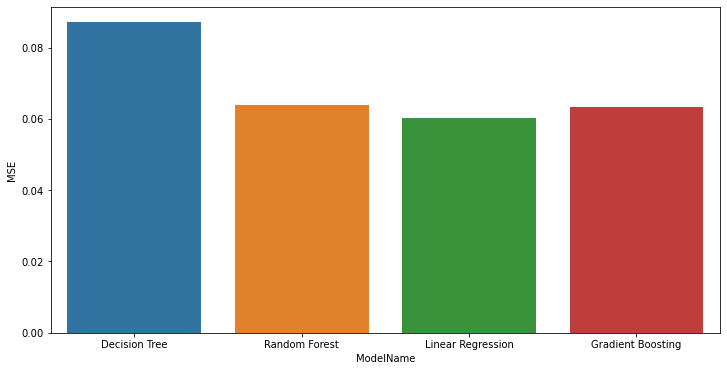

In [156]:
plt.figure(figsize=(12,6))
sns.barplot(x='ModelName', y='MSE', data=results)

In [157]:
# Prediction with test dataset with the model that has lowest MSE
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)
print('R^2 Score: ', r2_score(y_test, predictions))

R^2 Score:  0.8188432567829631
